In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import mne
from sklearn.decomposition import FastICA

In [2]:
import glob
import os
filename = "./dataset - Copy/autism/Bader_Autism_24_11_2011S001R09.dat"
with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        #my_signals= test.signals
        my_signals, stateslice = test[100:1100]
       

In [3]:
raw = pd.DataFrame(my_signals)
raw = pd.DataFrame.transpose(raw)

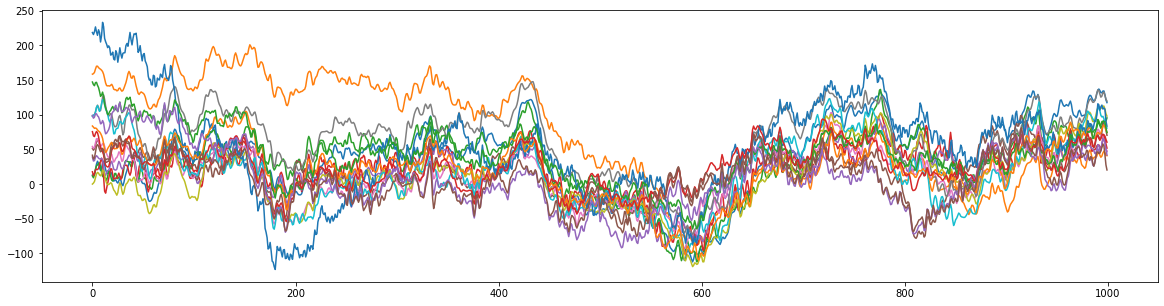

In [4]:
plt.figure(figsize = (20,5))
plt.plot(raw)

In [18]:
my_signals = np.rot90(my_signals)
data_normal = np.fft.fft2(my_signals)
fftraw = pd.DataFrame(data_normal)
#fftraw = pd.DataFrame.transpose(fftraw)

C:\Users\YAP\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


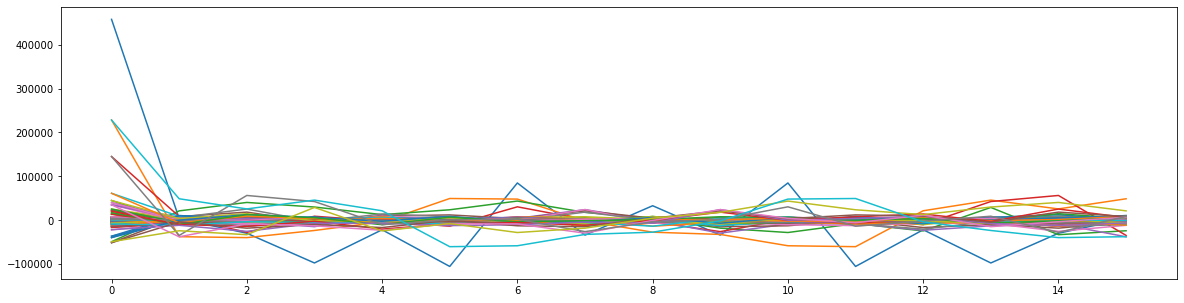

In [20]:
plt.figure(figsize = (20,5))
plt.plot(data_normal)

In [22]:
fftraw.head(1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,457396.5305032+0.0000000j,228245.872836+26041.541621j,-48728.738557-75196.765258j,145137.119491+198063.022667j,35330.833736-79896.395255j,-50992.653306-39463.549084j,-21438.321877-40908.248129j,20684.070838-22522.470531j,17389.095315+72704.554089j,61499.050568-6631.741975j,...,-39296.739429-53933.231480j,61499.050568+6631.741975j,17389.095315-72704.554089j,20684.070838+22522.470531j,-21438.321877+40908.248129j,-50992.653306+39463.549084j,35330.833736+79896.395255j,145137.119491-198063.022667j,-48728.738557+75196.765258j,228245.872836-26041.541621j
1,3950.9184000+7896.0620830j,-37263.064083+23194.363694j,21504.274035-15915.327408j,8782.033264-047332.5604780j,7032.2234450+3154.3880760j,8573.474419+21386.080430j,-5939.3576140+4633.2409200j,6422.0569370+1012.3734210j,6079.402230-14650.386178j,9043.840969-2253.443445j,...,325.337458+03542.3827680j,-5883.3620250+471.1578490j,-9511.2595790-1084.0644900j,-9707.675347-19732.831790j,-11357.477482-4079.487870j,-3811.0879140-7527.5780040j,-37486.901534-11077.712166j,-34354.8472460-15719.7345770j,-23730.537273-52094.437102j,49051.809927-60617.719014j
2,-29418.947077+78690.138324j,-39373.0733910+6345.0565850j,40702.714465-2062.324260j,-27389.0485480-13928.1189730j,-3157.882820+16533.237194j,18686.978839-13689.059589j,-11884.775451+5521.556836j,25646.4371503-337.1335550j,-1181.6310980-9766.6616290j,1745.912181-2711.847721j,...,13013.064372-2890.297280j,9556.6886070+667.0953430j,12969.845558-4290.080054j,-13772.793177-2672.233109j,-25092.815358+3116.634614j,-17816.174894+7938.442163j,-8074.374383+56854.993528j,56584.1280680+7534.9206920j,-32693.541133-43785.876922j,25961.621457+17123.908295j
3,-97047.649139+78478.889893j,-23107.821168-62955.823415j,30243.699219+8688.817815j,9327.15092300-8828.93025500j,-14457.535964+13053.644428j,-4161.9297220+8199.4818560j,-7205.002639+13634.754335j,-2619.782199+18497.235478j,-6204.8536880+5800.5371390j,-528.110636+04827.2037370j,...,6486.2613910+1318.5176110j,4123.7510500-294.7667440j,5935.8719390-2603.9155500j,-2105.863425-16936.335865j,-6721.770990-11922.630096j,-9452.769868-10327.110704j,-12501.604038-7468.874899j,42769.3390480+14609.9004150j,29326.997910-7406.038720j,46011.958856+70753.144568j
4,-21463.628926+2312.639946j,-3491.820887-023975.3969770j,12998.590236-37833.099996j,-1877.806127-023595.7744380j,11958.015647+4771.679070j,9863.8130000+163.5395560j,9337.2839750-4882.8371630j,14409.510973-8042.609469j,4027.6600380-5050.4729750j,6177.3823950+742.2762130j,...,-2095.9407370+871.0213110j,-7230.856728+2537.340363j,-9966.3698040-303.9036240j,-19948.389423+12476.737622j,-6551.981870+10725.552013j,-16472.945057+7529.535895j,-22644.282302+11813.973906j,-9837.848993-015277.2534590j,-24107.5878003-253.4684730j,21727.2415270+4554.5051800j
5,-104971.835478+8481.875320j,49670.643184-21418.290988j,23994.859354-1112.780603j,-13346.6108270-13617.0639880j,-5530.4448330-5121.9484140j,12311.137667-6505.865772j,4108.8771770-552.4502210j,8070.2686180+377.4539630j,304.294474-09081.9182810j,-4103.323189-8449.243914j,...,9124.8202690+4446.5248510j,296.2512420+856.7669490j,7238.4260490+5479.4295000j,-7918.5481590+876.3489330j,-12059.709066+4673.051276j,434.584588+04189.3812990j,-7606.052593+20451.991299j,942.929521+0040127.56938500j,-7363.6663080-2432.7438950j,-59984.9004420+9652.7684120j
6,85038.664967-11235.257365j,48335.6091850-5172.9681060j,43859.694472+12272.041730j,30723.6404990+12224.8869390j,4597.7847490+6800.3866760j,3923.1210710+8998.5268100j,201.14836400-868.52938500j,-190.445568+012386.2714540j,6707.3614320+6913.4506460j,4712.523375+11117.541200j,...,-5004.8135220-891.7776380j,-1112.695926-2439.456512j,-3197.4215960-4709.3759690j,-5011.640821-10342.176735j,-9990.937781-18153.577185j,-12429.608116-11483.552821j,-8402.858359-16240.467701j,2385.662111-010028.3521840j,-27743.205899-13907.790178j,-57898.9948900-2769.4621220j
7,-33637.104866-61702.444344j,-1273.8461070-6925.7791540j,18088.473445-4427